In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math

In [2]:
scene = cv.imread('scene.jpg',0)
news = cv.imread('news.png',0)
woman = cv.imread('woman.jpg',0)

In [3]:
def VectorAddition(v,u):
    return (v+u)/(1+np.dot(v,u))

def VectorSubtraction(v,u):
    return (v-u)/(1-np.dot(v,u))

def MultiplicationScalar(lam,v):
    #(1+v)**lam-(1-v)**lam/(1+v)**lam+(1-v)**lam
    return np.multiply(v,lam)

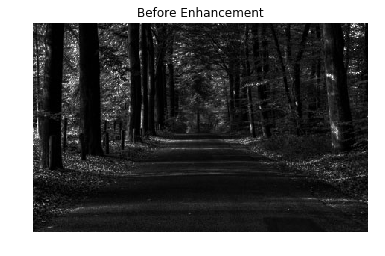

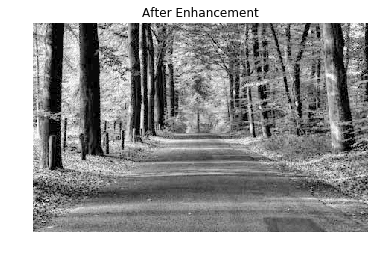

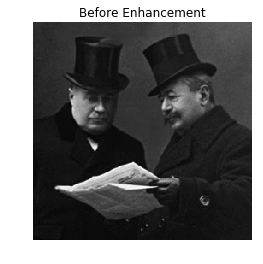

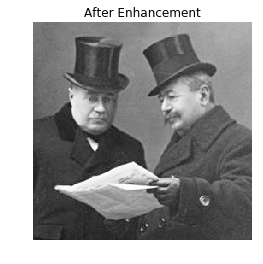

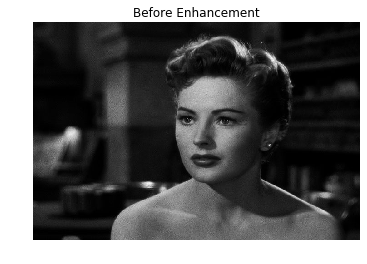

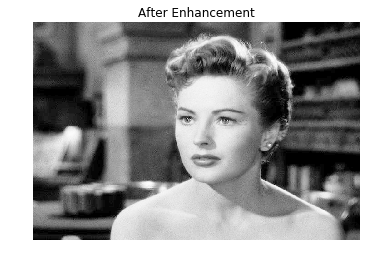

In [4]:
for img in [scene,news,woman]:
    rows = len(img)
    col = len(img[0])

    mean = img.mean()
    variance = img.var()
    
    varianceU = 0.333
    Lambda = (np.sqrt(varianceU))/(np.sqrt(variance))
    tao = 1/mean
    
    psi = MultiplicationScalar(Lambda,VectorAddition(img,tao))
    
    plt.imshow(img, cmap='gray')
    plt.title('Before Enhancement')
    plt.axis('off')
    plt.show()
    plt.imshow(psi, cmap='gray')
    plt.title('After Enhancement')
    plt.axis('off')
    plt.show()

In [5]:
def Combination(n,k):
    return (math.factorial(n))/(math.factorial(k)*math.factorial(n-k))

def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

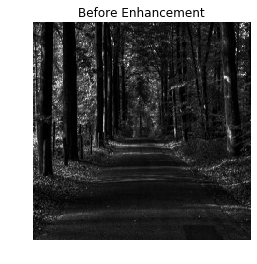

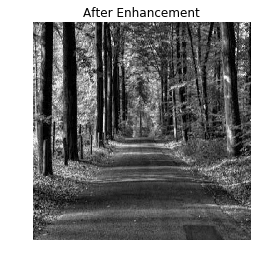

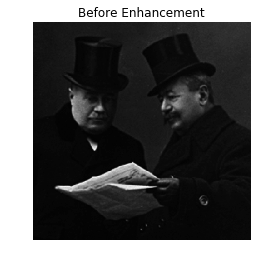

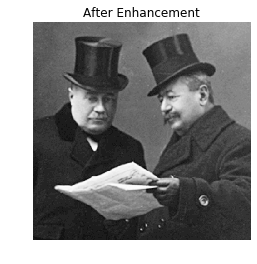

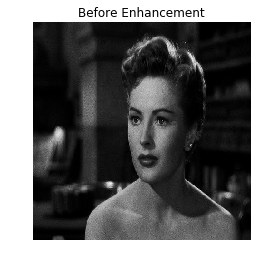

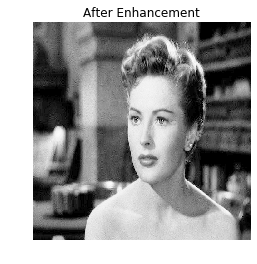

In [26]:
scene = cv.imread('sceneSQ.jpg',0)
news = cv.imread('newsSQ.png',0)
woman = cv.imread('womanSQ.jpg',0)
for test_image in [scene,news,woman]:

    m = 120
    n = 120

    windows=[]

    for r in range(0,test_image.shape[0] - m, m):
        for c in range(0,test_image.shape[1] - n, n):
            window = test_image[r:r+m,c:c+n]
            windows.append(window)

    card_windows = len(windows)
    windows = to_matrix(windows,3)
    windows = np.array(windows,float)

    pijLst=[]
    for i in range(len(windows[0])):
        for j in range(len(windows[0])):
            x0 = windows[i][j][0][0]
            x1 = windows[i][j][0][m-1]
            y0 = windows[i][j][0][0]
            y1 = windows[i][j][0][n-1]
            for x in range(len(windows[i][j])):
                for y in range(len(windows[i][j][x])):
                    a1 = np.power(windows[i][j][x][y]-x0,i)
                    b1 = np.power(x1-windows[i][j][x][y],3-i)
                    c1 = np.power(x1-x0,3)

                    a2 = np.power(windows[i][j][x][y]-y0,j)
                    b2 = np.power(y1-windows[i][j][x][y],3-j)
                    c2 = np.power(y1-y0,3)

                    ab1 = np.multiply(a1,b1)
                    abc1 = np.divide(ab1,c1)

                    ab2 = np.multiply(a2,b2)
                    abc2 = np.divide(ab2,c2)

                    qxi = np.multiply(Combination(3,i),abc1)
                    qyj = np.multiply(Combination(3,j),abc2)

                    pij = np.multiply(qxi,qyj)
                    pijLst.append(pij)

    pijLst = to_matrix(to_matrix(to_matrix(pijLst,120),120),3)

    windowLst=[]
    gamma = 4
    ssum = np.sum(pijLst)
    for i in range(len(windows[0])):
        for j in range(len(windows[0])):
            for x in range(len(windows[i][j])):
                for y in range(len(windows[i][j][x])):
                    po1 = np.power(ssum,gamma)
                    po2 = np.power(pijLst[i][j][x][y],gamma)
                    wij = np.divide(po2,ssum)
                    windowLst.append(wij)

    windowLst = to_matrix(to_matrix(to_matrix(windowLst,120),120),3)

    mean = 0
    for i in range(len(windows[0])):
        for j in range(len(windows[0])):
            s = np.sum(windowLst[i][j])
            for x in range(len(windows[i][j])):
                for y in range(len(windows[i][j][x])):
                    mean = mean + MultiplicationScalar(windowLst[i][j][x][y]/s,test_image[x][y])

    var = 0
    for i in range(len(windows[0])):
        for j in range(len(windows[0])):
            s = np.sum(windowLst[i][j])
            for x in range(len(windows[i][j])):
                for y in range(len(windows[i][j][x])):
                    var = var + np.divide(windowLst[i][j][x][y]*np.power(VectorSubtraction(test_image[x][y],mean),2),s)

    Var = 0.333
    Lambda = np.divide(np.sqrt(Var),np.sqrt(var))
    tao = 1/mean*5


    psi = MultiplicationScalar(Lambda,VectorAddition(test_image,np.abs(tao)))
    psi_enh = MultiplicationScalar(abs(np.sum(windowLst)),psi)

    plt.imshow(test_image, cmap='gray')
    plt.title('Before Enhancement')
    plt.axis('off')
    plt.show()

    plt.imshow(psi_enh, cmap='gray')
    plt.title('After Enhancement')
    plt.axis('off')
    plt.show()